In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [01:08<00:00, 68.4MB/s]
100% 2.70G/2.70G [01:08<00:00, 42.3MB/s]


In [6]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [7]:
import torch


In [8]:
torch.__version__

'1.12.0+cu113'

In [9]:
! [ -e /content ] && pip install -Uqq fastai

In [10]:
import fastai
fastai.__version__

'2.7.7'

In [11]:
from fastai.vision.all import *

In [12]:
!nvidia-smi

Wed Jul 27 18:29:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
train_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
train_dls = ImageDataLoaders.from_folder(train_path, bs=64, valid_pct = 0.2, item_tfms=Resize(256))

In [22]:
valid_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
valid_dls = ImageDataLoaders.from_folder(valid_path, valid_pct=0.2, item_tfms=Resize(256))

In [23]:
test_path = "/content/test/test"
test_dls = ImageDataLoaders.from_folder(test_path, valid_pct=0.2, item_tfms=Resize(256))

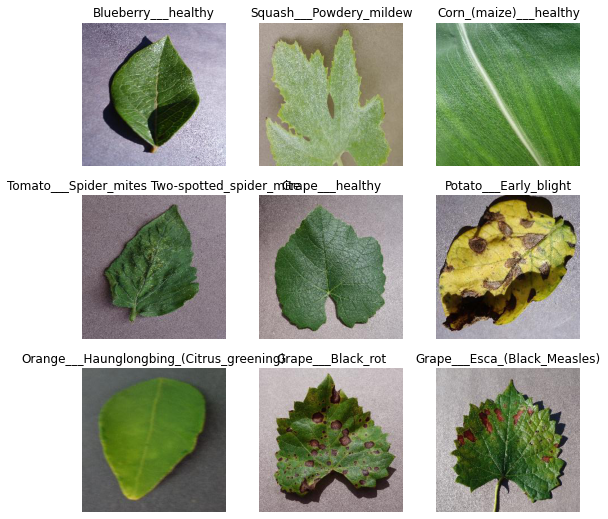

In [24]:
train_dls.show_batch()

In [27]:
learn = cnn_learner(train_dls, resnet34, metrics=[error_rate,accuracy],model_dir="C:/Users/ULIS/Downloads/")

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

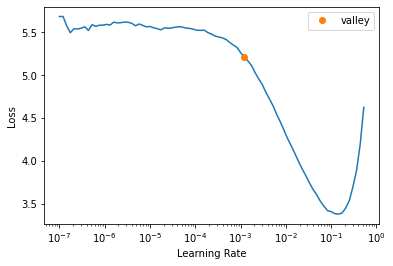

In [28]:
learn.lr_find()

In [29]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.185969,0.103003,0.033786,0.966214,04:42
1,0.082217,0.034807,0.011096,0.988904,04:52
2,0.037330,0.022987,0.006188,0.993812,04:45
3,0.022041,0.019459,0.006046,0.993954,04:43


In [32]:
learn.save('fastai_plant.pkl')

Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/C:/Users/ULIS/Downloads/fastai_plant.pkl.pth')

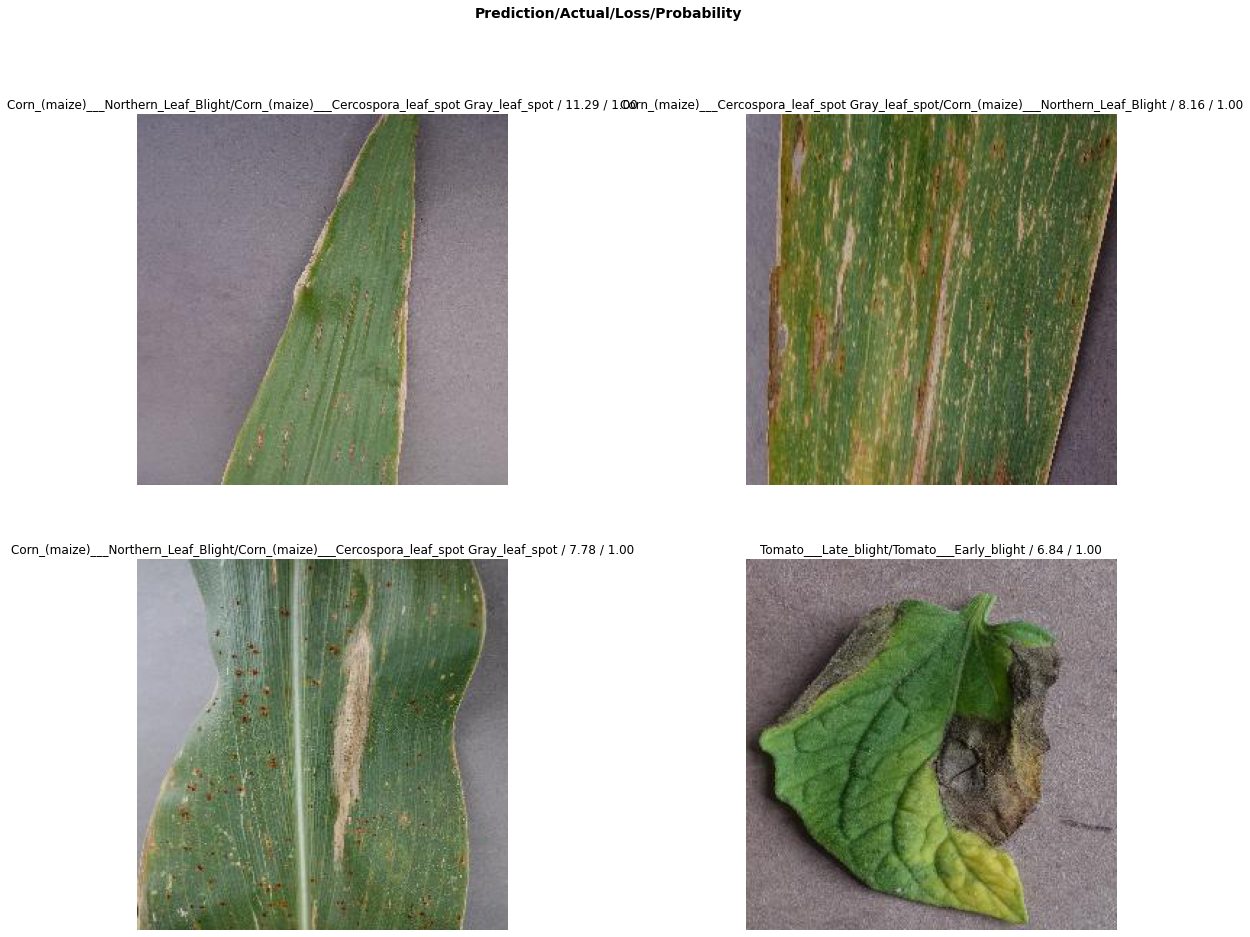

In [39]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(20,15))

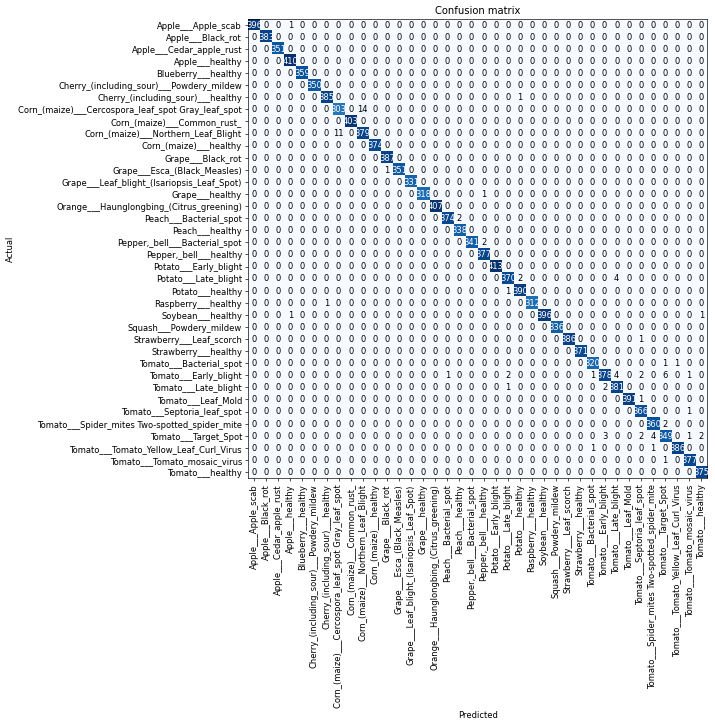

In [34]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [35]:
interpretation.most_confused(min_val=2)

[('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  14),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  11),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 6),
 ('Potato___Late_blight', 'Tomato___Late_blight', 4),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 4),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 4),
 ('Tomato___Target_Spot', 'Tomato___Early_blight', 3),
 ('Peach___Bacterial_spot', 'Peach___healthy', 2),
 ('Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 2),
 ('Potato___Late_blight', 'Potato___healthy', 2),
 ('Tomato___Early_blight', 'Potato___Late_blight', 2),
 ('Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 2),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 2),
 ('Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Targ

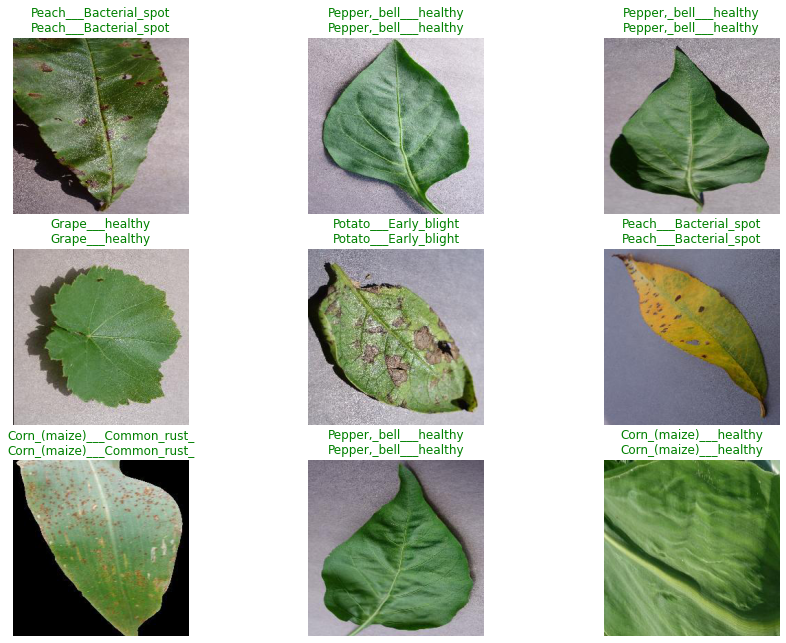

In [38]:
learn.show_results(figsize=(15,11))